In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
df = pd.read_csv('data/BRCA.csv')
data = df.copy()

In [32]:
df = df.drop([334, 335, 336, 337, 338, 339, 340])
data = data.drop([334, 335, 336, 337, 338, 339, 340])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [34]:
ohe = pd.get_dummies(data[['Gender', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type']])

data = data.drop(['Gender', 'Patient_ID', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit'], axis = 1)

le = LabelEncoder()
data['patient_status'] = le.fit_transform(data['Patient_Status'])
data = data.drop('Patient_Status', axis=1)

data = data.join(ohe)
data

,Age,Protein1,Protein2,Protein3,Protein4,patient_status,Gender_FEMALE,Gender_MALE,Tumour_Stage_I,Tumour_Stage_II,...,Histology_Infiltrating Lobular Carcinoma,Histology_Mucinous Carcinoma,ER status_Positive,PR status_Positive,HER2 status_Negative,HER2 status_Positive,Surgery_type_Lumpectomy,Surgery_type_Modified Radical Mastectomy,Surgery_type_Other,Surgery_type_Simple Mastectomy
0,36.0,0.080353,0.42638,0.54715,0.273680,0,1,0,0,0,...,0,0,1,1,1,0,0,1,0,0
1,43.0,-0.420320,0.57807,0.61447,-0.031505,1,1,0,0,1,...,0,1,1,1,1,0,1,0,0,0
2,69.0,0.213980,1.31140,-0.32747,-0.234260,0,1,0,0,0,...,0,0,1,1,1,0,0,0,1,0
3,56.0,0.345090,-0.21147,-0.19304,0.124270,0,1,0,0,1,...,0,0,1,1,1,0,0,1,0,0
4,56.0,0.221550,1.90680,0.52045,-0.311990,1,1,0,0,1,...,0,0,1,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,36.0,0.231800,0.61804,-0.55779,-0.517350,1,1,0,0,0,...,0,0,1,1,0,1,0,0,0,1
330,44.0,0.732720,1.11170,-0.26952,-0.354920,1,0,1,0,1,...,1,0,1,1,1,0,0,0,1,0
331,61.0,-0.719470,2.54850,-0.15024,0.339680,1,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
332,79.0,0.479400,2.05590,-0.53136,-0.188480,1,1,0,1,0,...,0,0,1,1,0,1,1,0,0,0


In [35]:
data['er_status_positive'], data['pr_status_positive'], data['her2_status_negative'], data['her2_status_positive'] = data['ER status_Positive'], data['PR status_Positive'], data['HER2 status_Negative'], data['HER2 status_Positive']

In [36]:
data = data.drop(['ER status_Positive',
       'PR status_Positive', 'HER2 status_Negative', 'HER2 status_Positive'], axis = 1)
data = data.drop(['er_status_positive', 'pr_status_positive'], axis=1)

In [37]:
cut = data[data['patient_status'] <= 1]
data = cut
data.patient_status.value_counts()

0    255
1     66
Name: patient_status, dtype: int64

In [49]:
def replace():
    if i in col:
        

In [50]:
df['Patient_Status'] = df['Patient_Status'].apply(replace)

TypeError: replace() takes 0 positional arguments but 1 was given

In [46]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44.0,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61.0,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


<AxesSubplot:>

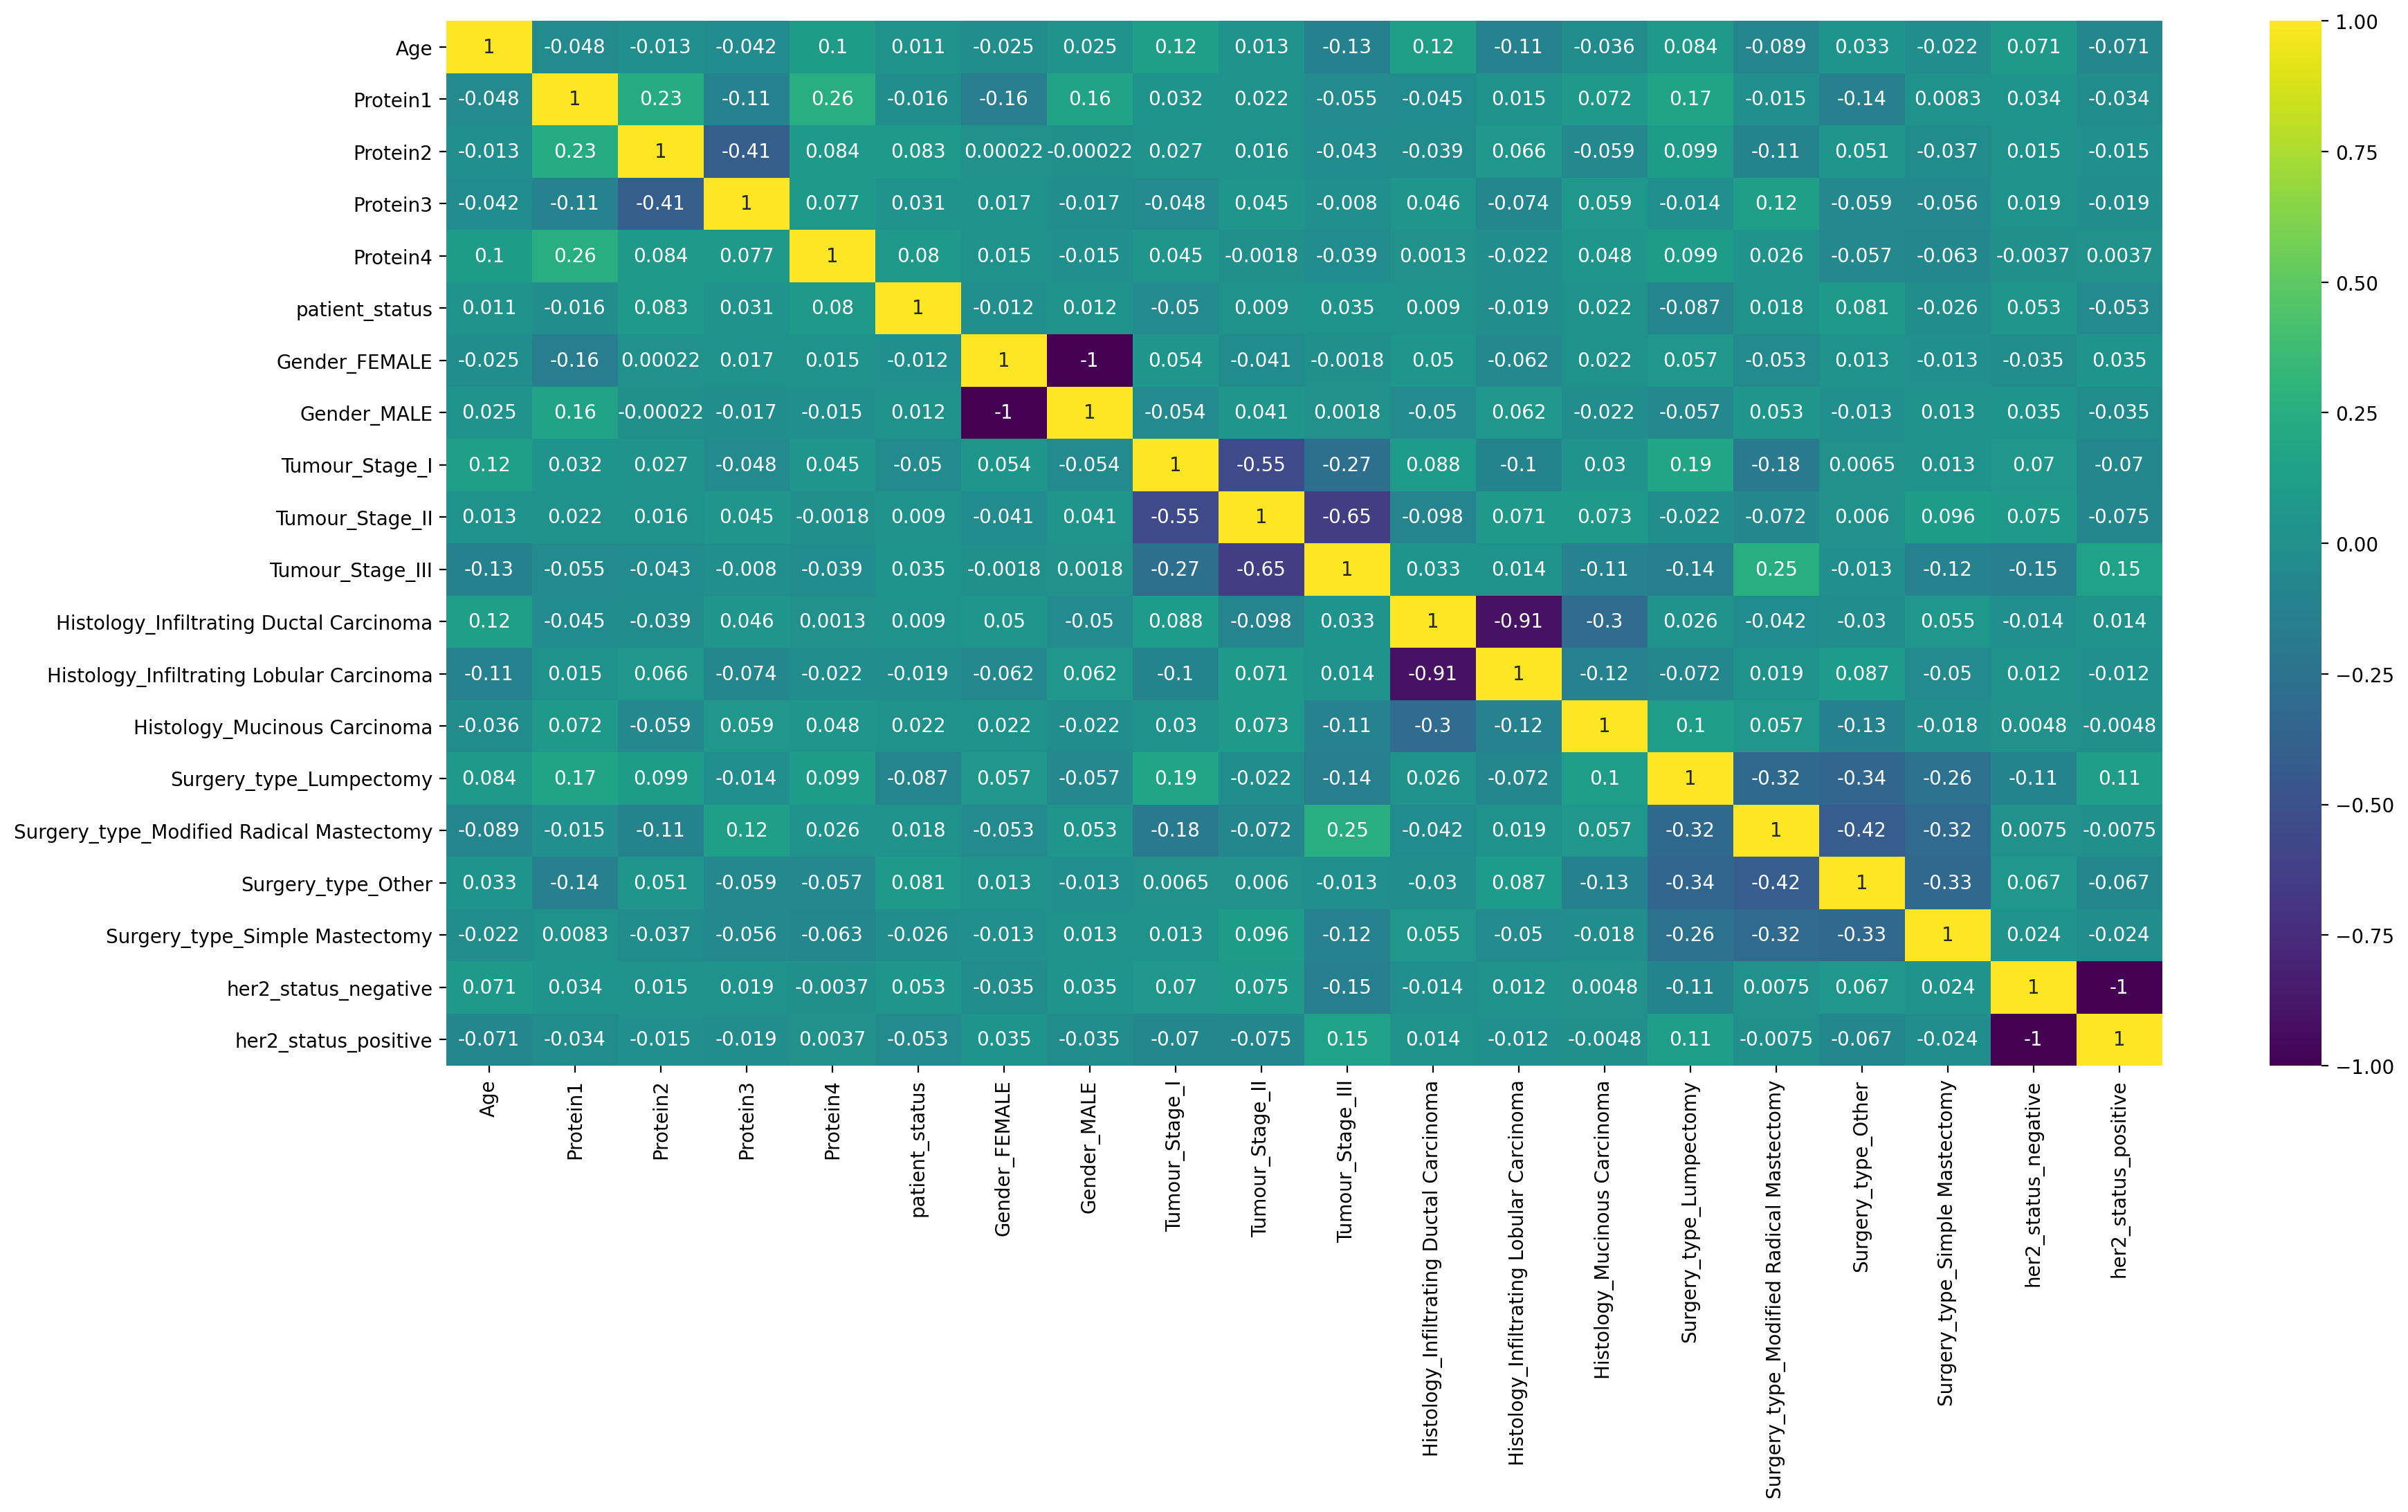

In [10]:
def corrmatrix(i, j):
    plt.figure(figsize=(20, 10), dpi=200)
    return sns.heatmap(i.corr(method=j), cmap='viridis', annot=True)

corrmatrix(data, 'pearson')

# pearson’, ‘kendall’, ‘spearman’

# ML

Logistic Regression.
Naive Bayes.
K-Nearest Neighbors.
Decision Tree.
Support Vector Machines.

In [11]:
X = data.drop('patient_status', axis=1)
y = data['patient_status']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
def modeldev(i, j, k, l, m):
    model = i()
    model.fit(j, k)
    y_pred = model.predict(l)
    print(classification_report(m, y_pred))

In [14]:
modeldev(KNeighborsClassifier, X_train, y_train, X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        78
           1       0.40      0.11      0.17        19

    accuracy                           0.79        97
   macro avg       0.61      0.53      0.52        97
weighted avg       0.73      0.79      0.74        97



In [15]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.88        78
           1       0.40      0.11      0.17        19

    accuracy                           0.79        97
   macro avg       0.61      0.53      0.52        97
weighted avg       0.73      0.79      0.74        97



In [16]:
ss = StandardScaler()
mm = MinMaxScaler()

scaled_X_train, scaled_X_test = ss.fit_transform(X_train), ss.fit_transform(X_test)
mm_X_train, mm_X_test = ss.fit_transform(X_train), ss.fit_transform(X_test)

In [17]:
modeldev(KNeighborsClassifier, scaled_X_train, y_train, scaled_X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        78
           1       0.30      0.16      0.21        19

    accuracy                           0.76        97
   macro avg       0.56      0.53      0.53        97
weighted avg       0.72      0.76      0.73        97



In [18]:
modeldev(KNeighborsClassifier, mm_X_train, y_train, mm_X_test, y_test)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        78
           1       0.30      0.16      0.21        19

    accuracy                           0.76        97
   macro avg       0.56      0.53      0.53        97
weighted avg       0.72      0.76      0.73        97



# Optimisation

In [29]:
def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report)
    return df_classification_report

get_classification_report(y_test, y_pred)

,0,1,accuracy,macro avg,weighted avg
precision,0.815217,0.400000,0.793814,0.607609,0.733886
recall,0.961538,0.105263,0.793814,0.533401,0.793814
f1-score,0.882353,0.166667,0.793814,0.524510,0.742167
support,78.000000,19.000000,0.793814,97.000000,97.000000
